# Glider data from the Glider Data Assembly center

Glider data from the US Integrated Ocean Observing System

A map of current glider deployments is available here:
https://gliders.ioos.us/map/

and data is available via THREDDS server: https://gliders.ioos.us/thredds/catalog/deployments/catalog.html

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

/Users/beaird/anaconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [9]:
# url = 'http://gliders.ioos.us/thredds/dodsC/deployments/mbari/UW157-20190916T0000/UW157-20190916T0000.nc3.nc'
url = 'http://gliders.ioos.us/thredds/dodsC/deployments/bios/bios_minnie-20191021T1613/bios_minnie-20191021T1613.nc3.nc'

gl = xr.open_dataset(url, decode_times=False)

gl

<xarray.Dataset>
Dimensions:                                  (obs: 247, profile: 1344, trajectory: 1)
Coordinates:
  * trajectory                               (trajectory) object 'bios_minnie-20191021T1613'
    time                                     (trajectory, profile) float64 ...
    latitude                                 (trajectory, profile) float64 ...
    longitude                                (trajectory, profile) float64 ...
    time_uv                                  (trajectory, profile) float64 ...
    lat_uv                                   (trajectory, profile) float64 ...
    lon_uv                                   (trajectory, profile) float64 ...
    depth                                    (trajectory, profile, obs) float32 ...
Dimensions without coordinates: obs, profile
Data variables:
    wmo_id                                   (trajectory) object ...
    profile_id                               (trajectory, profile) float64 ...
    u                   

# data dimensions are profile and observation number
but its not actually gridded, and adjacent profiles are going in oposite directions (observation 1 is at the surface in profile 1, and observation 1 is at depth in profile two)

In [6]:
gl.squeeze()

<xarray.Dataset>
Dimensions:          (obs: 521, profile: 1068)
Coordinates:
    trajectory       <U19 'UW157-20190916T0000'
    time             (profile) datetime64[ns] ...
    latitude         (profile) float64 ...
    longitude        (profile) float64 ...
    time_uv          (profile) datetime64[ns] ...
    lat_uv           (profile) float64 ...
    lon_uv           (profile) float64 ...
    depth            (profile, obs) float32 ...
Dimensions without coordinates: obs, profile
Data variables:
    wmo_id           object ...
    profile_id       (profile) float64 ...
    u                (profile) float64 ...
    v                (profile) float64 ...
    precise_time     (profile, obs) datetime64[ns] ...
    pressure         (profile, obs) float32 ...
    temperature      (profile, obs) float32 ...
    conductivity     (profile, obs) float32 ...
    salinity         (profile, obs) float32 ...
    density          (profile, obs) float32 ...
    precise_lat      (profile, obs) fl

(0, 50)

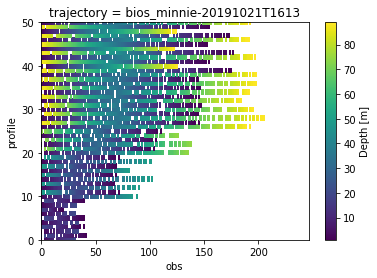

In [11]:
gl.depth.squeeze().plot()
plt.ylim(0,50)

ValueError: x and y must be the same size

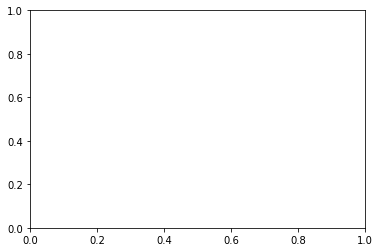

In [20]:
plt.scatter(gl.time.squeeze().values.ravel(), gl.pressure.squeeze().values.ravel(),  c=gl.temperature.squeeze().values.ravel());